In [1]:
!pip install langgraph langsmith


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.0/133.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.9 MB/s eta 0:00:00


In [2]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.2/122.2 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.7 MB/s eta 0:00:00


In [6]:
from google.colab import userdata
groq_api_key = userdata.get('groq_api_key')
langsmith = userdata.get('langsmith_api_key')



In [7]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "Langchainproject"

In [8]:
from langchain_groq import ChatGroq

In [10]:
llm = ChatGroq(groq_api_key = groq_api_key, model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x79baa8f1c510>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x79baa8f1fd90>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

## Start building Chatboat using Langgraph

In [12]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


In [13]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)



In [14]:
graph_builder

In [15]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [16]:
graph_builder.add_node("chatbot",chatbot)

In [17]:
graph_builder

In [18]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [19]:
graph=graph_builder.compile()

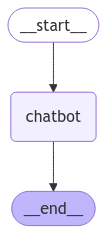

In [20]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [21]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

User: hi 
dict_values([{'messages': AIMessage(content='Hi! 👋 How can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 11, 'total_tokens': 25, 'completion_time': 0.025454545, 'prompt_time': 0.001963114, 'queue_time': 0.234934837, 'total_time': 0.027417659}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-1230661b-263e-4783-a293-5adb888fbed2-0', usage_metadata={'input_tokens': 11, 'output_tokens': 14, 'total_tokens': 25})}])
content='Hi! 👋 How can I help you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 11, 'total_tokens': 25, 'completion_time': 0.025454545, 'prompt_time': 0.001963114, 'queue_time': 0.234934837, 'total_time': 0.027417659}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-1230661b-263e-4783-a293